In [2]:
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Model
from sklearn.utils import shuffle

In [3]:
data_dir = r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\kaggle_multiple\dataset" # Replace with the actual path to the dataset folder
Actinic_Keratosis_dir = os.path.join(data_dir, "Actinic Keratosis")
Atopic_Dermatitis_dir = os.path.join(data_dir, "Atopic Dermatitis")

Benign_keratosis_dir = os.path.join(data_dir, "Benign keratosis")
Dermatofibroma_dir = os.path.join(data_dir, "Dermatofibroma")

Melanocytic_nevus_dir = os.path.join(data_dir, "Melanocytic nevus")
Melanoma_dir = os.path.join(data_dir, "Melanoma")

Squamous_cell_carcinoma_dir = os.path.join(data_dir, "Squamous cell carcinoma")
Tinea_Ringworm_Candidiasis_dir = os.path.join(data_dir, "Tinea Ringworm Candidiasis")

Vascular_lesion_dir = os.path.join(data_dir, "Vascular lesion")


In [4]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32


In [5]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith((".jpg", ".png", ".jpeg")):
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(label)
    return images, labels

In [6]:
# Load benign and malignant images
Actinic_Keratosis_images, Actinic_Keratosis_labels = load_images_from_folder(Actinic_Keratosis_dir, 0)  
Atopic_Dermatitis_images, Atopic_Dermatitis_labels = load_images_from_folder(Atopic_Dermatitis_dir, 1) 
Benign_keratosis_images, Benign_keratosis_labels = load_images_from_folder(Benign_keratosis_dir, 2)  
Dermatofibroma_images, Dermatofibroma_labels = load_images_from_folder(Dermatofibroma_dir, 3) 
Melanocytic_nevus_images, Melanocytic_nevus_labels = load_images_from_folder(Melanocytic_nevus_dir, 4)  
Melanoma_images, Melanoma_labels = load_images_from_folder(Melanoma_dir, 5) 
Squamous_cell_carcinoma_images, Squamous_cell_carcinoma_labels = load_images_from_folder(Squamous_cell_carcinoma_dir, 6)  
Tinea_Ringworm_Candidiasis_images, Tinea_Ringworm_Candidiasis_labels = load_images_from_folder(Tinea_Ringworm_Candidiasis_dir, 7) 
Vascular_lesion_images, Vascular_lesion_labels = load_images_from_folder(Vascular_lesion_dir, 8)  


In [7]:
X = np.array(Actinic_Keratosis_images + Atopic_Dermatitis_images+ Benign_keratosis_images +Dermatofibroma_images+ Melanocytic_nevus_images+Melanoma_images+  Squamous_cell_carcinoma_images+Tinea_Ringworm_Candidiasis_images+Vascular_lesion_images )
y = np.array(Actinic_Keratosis_labels + Atopic_Dermatitis_labels+ Benign_keratosis_labels +Dermatofibroma_labels+ Melanocytic_nevus_labels+Melanoma_labels+  Squamous_cell_carcinoma_labels+Tinea_Ringworm_Candidiasis_labels+Vascular_lesion_labels )
X, y = shuffle(X, y, random_state=42)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet', pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

C:\Users\vishal haldar\AppData\Local\Temp\ipykernel_10108\3797615224.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet', pooling='avg')


In [10]:
X_train_features = feature_extractor.predict(X_train, batch_size=BATCH_SIZE)
X_test_features = feature_extractor.predict(X_test, batch_size=BATCH_SIZE)

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_features, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
dt_model.score(X_train_features, y_train)*100,dt_model.score(X_test_features, y_test)*100

(100.0, 33.13609467455622)

In [13]:
y_pred = dt_model.predict(X_test_features)

In [14]:

accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names= [
    "Actinic Keratosis", "Atopic Dermatitis", "Benign Keratosis", "Dermatofibroma",
    "Melanocytic Nevus", "Melanoma", "Squamous Cell Carcinoma", 
    "Tinea Ringworm Candidiasis", "Vascular Lesion"
]
))

Accuracy: 33.14
Classification Report:
                             precision    recall  f1-score   support

         Actinic Keratosis       0.23      0.26      0.24        23
         Atopic Dermatitis       0.45      0.42      0.43        12
          Benign Keratosis       0.43      0.32      0.36        19
            Dermatofibroma       0.32      0.27      0.29        22
         Melanocytic Nevus       0.42      0.40      0.41        20
                  Melanoma       0.26      0.31      0.29        16
   Squamous Cell Carcinoma       0.35      0.33      0.34        18
Tinea Ringworm Candidiasis       0.38      0.30      0.33        20
           Vascular Lesion       0.29      0.42      0.34        19

                  accuracy                           0.33       169
                 macro avg       0.35      0.34      0.34       169
              weighted avg       0.34      0.33      0.33       169



In [15]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Example accuracy calculation
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, target_names=[    "Actinic Keratosis", "Atopic Dermatitis", "Benign Keratosis", "Dermatofibroma",
    "Melanocytic Nevus", "Melanoma", "Squamous Cell Carcinoma", 
    "Tinea Ringworm Candidiasis", "Vascular Lesion"], output_dict=True)

# Convert to a DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Multiply relevant metrics by 100 to show as percentages
percentage_metrics = ['precision', 'recall', 'f1-score', 'support']
for metric in percentage_metrics:
    if metric in report_df:
        report_df[metric] = report_df[metric].apply(lambda x: f"{x * 100:.2f}%" if isinstance(x, float) else x)

print("Classification Report (with percentages):\n")
print(report_df)


Accuracy: 33.14%
Classification Report (with percentages):

                           precision  recall f1-score    support
Actinic Keratosis             23.08%  26.09%   24.49%   2300.00%
Atopic Dermatitis             45.45%  41.67%   43.48%   1200.00%
Benign Keratosis              42.86%  31.58%   36.36%   1900.00%
Dermatofibroma                31.58%  27.27%   29.27%   2200.00%
Melanocytic Nevus             42.11%  40.00%   41.03%   2000.00%
Melanoma                      26.32%  31.25%   28.57%   1600.00%
Squamous Cell Carcinoma       35.29%  33.33%   34.29%   1800.00%
Tinea Ringworm Candidiasis    37.50%  30.00%   33.33%   2000.00%
Vascular Lesion               28.57%  42.11%   34.04%   1900.00%
accuracy                      33.14%  33.14%   33.14%     33.14%
macro avg                     34.75%  33.70%   33.87%  16900.00%
weighted avg                  34.18%  33.14%   33.30%  16900.00%


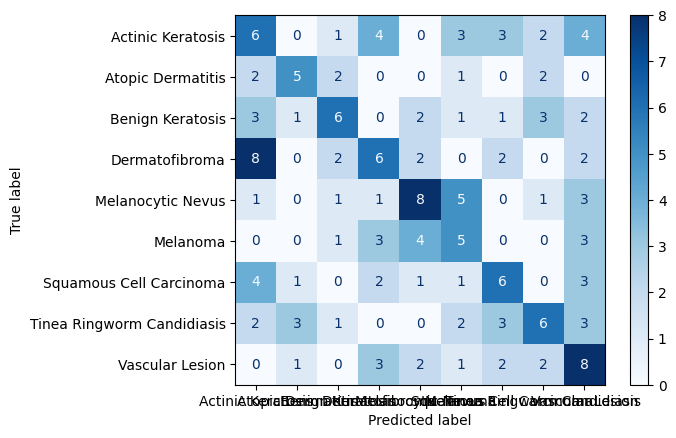

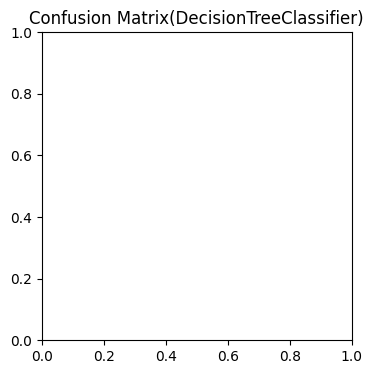

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true and predicted labels respectively
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "Actinic Keratosis", "Atopic Dermatitis", "Benign Keratosis", "Dermatofibroma",
    "Melanocytic Nevus", "Melanoma", "Squamous Cell Carcinoma", 
    "Tinea Ringworm Candidiasis", "Vascular Lesion"
])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix(DecisionTreeClassifier)")
plt.show()


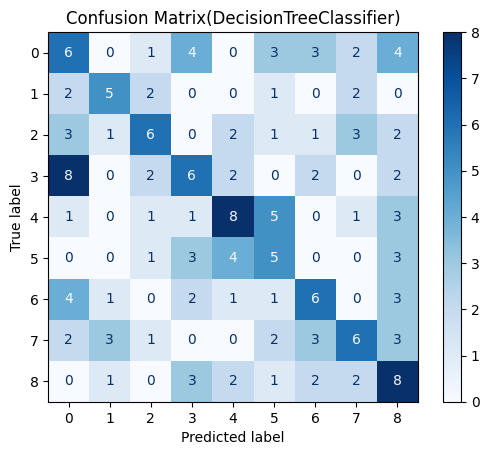

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true and predicted labels respectively
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "0","1","2","3","4","5","6","7","8"
])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix(DecisionTreeClassifier)")
plt.show()


<Figure size 300x400 with 0 Axes>

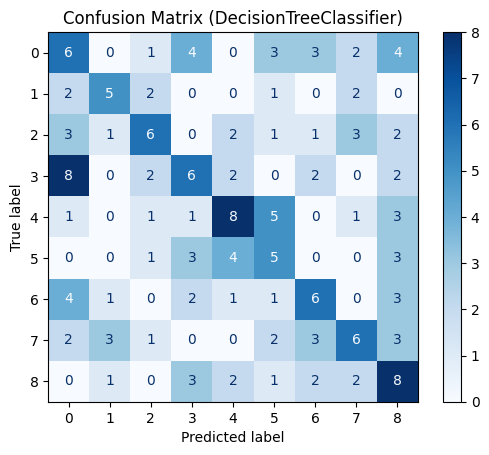

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true and predicted labels respectively
# Example: y_test = [0, 1, 2, 1, ...] and y_pred = [0, 2, 2, 1, ...]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "0", "1", "2", "3", "4", "5", "6", "7", "8"
])

# Plot with a specified figure size
plt.figure(figsize=(3, 4))  # Adjust figure size as needed
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (DecisionTreeClassifier)")
plt.show()
